# model_2: actually playing the game
The idea of this model is to take model_1, which avoids collisions and continue training it with more features so it also chases the food.

We start by going through the same process that we did in to get model_1:

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import *
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm


In [76]:
from google.colab import drive

drive.mount('/content/drive')
RunningInCOLAB = 'google.colab' in str(get_ipython())

path = "./data_collection/training_data/snake2_game_output_1.csv"

# NOTE: this path will need to be changed if you are running this in colab!
if RunningInCOLAB:
  path = "/content/drive/MyDrive/24Winter/cs320-w24/cs320-final-project/neural_network/data_collection/training_data/snake2_game_output_1.csv"
  sys.path.append('/content/drive/MyDrive/24Winter/cs320-w24/cs320-final-project/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We add placeholder variables denoting the X and Y locations of the food. This is so are network will be the right shape.

In [77]:
df_import = pd.read_csv(path)
df_import.head()

# place holder columns for food locations
df_import['foodAngle'] = 0

df = df_import
df.head()

,obstacleL,obstableF,obstacleR,direction_choice,game_over,foodAngle
0,0,0,0,2,0,0
1,0,0,0,2,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [78]:
# selecting better training set:
df_game_over = df[df['game_over'] == 1]
df_game_not_over = df[df['game_over'] == 0]
df_game_not_over_sample = df_game_not_over.sample(n=500, random_state=42)
df_game_not_over_sample

# this df will have more equal amounts of dead/alive examples
df_sample = pd.concat([df_game_over, df_game_not_over_sample], ignore_index=True)


In [79]:
# downsizing data so ratio of death/non-death is more euquak
df = df_sample

df['direction_choice'] = df['direction_choice'] - 1

In [80]:
X = df.drop('game_over', axis=1).to_numpy()
y = df['game_over'].to_numpy()
print(X.shape, "\n", y.shape)

X_feature_shape = X.shape[1]
X_feature_shape

(760, 5) 
 (760,)


5

In [81]:
# create testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
# init model
model = keras.Sequential()

# input layer
model.add(Input(shape=(X_feature_shape,)))
model.add(Dense(units=(5), activation='sigmoid'))
model.add(Dense(units=(5), activation='sigmoid'))
model.add(Dense(units=(1), activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 5)                 30        
                                                                 
 dense_37 (Dense)            (None, 5)                 30        
                                                                 
 dense_38 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
# verifying the model is completley untrained and not cached
obs = [1,0,0]
dir = 1
food = [0]

input = np.concatenate([obs, [dir], food]).reshape((1,5))

model.predict(input)

1/1 [==============================] - 0s 23ms/step


array([[0.5333198]], dtype=float32)

In [87]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/40
17/17 [==============================] - 1s 14ms/step - loss: 0.2310 - accuracy: 0.6165 - val_loss: 0.2269 - val_accuracy: 0.6447
Epoch 2/40
17/17 [==============================] - 0s 4ms/step - loss: 0.2202 - accuracy: 0.6635 - val_loss: 0.2270 - val_accuracy: 0.6447
Epoch 3/40
17/17 [==============================] - 0s 5ms/step - loss: 0.2160 - accuracy: 0.6635 - val_loss: 0.2200 - val_accuracy: 0.6447
Epoch 4/40
17/17 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.6635 - val_loss: 0.2148 - val_accuracy: 0.6447
Epoch 5/40
17/17 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.6635 - val_loss: 0.2075 - val_accuracy: 0.6447
Epoch 6/40
17/17 [==============================] - 0s 4ms/step - loss: 0.1949 - accuracy: 0.6635 - val_loss: 0.1959 - val_accuracy: 0.6447
Epoch 7/40
17/17 [==============================] - 0s 4ms/step - loss: 0.1807 - accuracy: 0.6654 - val_loss: 0.1757 - val_accuracy: 0.6535
Epoch 8/40
17/17 [=

In [12]:
history.history['accuracy']

[0.7274436354637146,
 0.9229323267936707,
 0.9360902309417725,
 0.951127827167511,
 0.9548872113227844,
 0.9661654233932495,
 0.9661654233932495,
 0.9661654233932495,
 0.9661654233932495,
 0.9680451154708862,
 0.9887217879295349,
 0.9962406158447266,
 0.9981203079223633,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [114]:
# import game logic
from game import snake_game_2

def angle_between_two_points(p1: np.array, p2: np.array):
  # Calculate the dot product of the two vectors
  dot_product = np.dot(p1, p2)

  # Calculate the magnitudes of the vectors
  magnitude1 = np.linalg.norm(p1)
  magnitude2 = np.linalg.norm(p2)

  # Calculate the cosine of the angle between the vectors
  cosine_angle = dot_product / (magnitude1 * magnitude2)

  # Calculate the angle in radians
  angle_radians = np.arccos(np.clip(cosine_angle, -1.0, 1.0))

  # Convert radians to degrees
  angle_degrees = np.degrees(angle_radians)

  return angle_degrees

def score_move(obs, direction, food_angle):
  """
  Custom loss function for RL space
  Params:
  """
  # higher numbers are WORSE
  death = 0

  if move_will_kill_snake(obs, direction):
    death = 1


  WEIGHT_food = 10
  WEIGHT_death = 0

  return abs(food_angle)*WEIGHT_food + death*WEIGHT_death

new_X_train = []
new_y_train = []

def move_will_kill_snake(state: np.array, direction: int):
  """Check whether or not move will kill snake"""
  return state[direction + 1] == 1

EPOCHS: int = 10

for _ in tqdm(range(EPOCHS)):
  game = snake_game_2.Game(gui_enabled=False)

  snake_dead = False

  move_limit = 30

  n_moves = 0

  while not snake_dead and n_moves < move_limit:
    obs = game.generate_observation()
    food_location = game.get_food_coordinates()
    head_location = game.get_snake_head_coordinates()


    # print(food_location)
    score_predictions = []
    score_actual = []
    states = []

    for direction in [-1, 0, 1]:
        score_prediction = model.predict(state, verbose=0)


        next_head_location = game.get_next_head(direction)

        food_angle = angle_between_two_points(next_head_location, food_location)/180

        state = np.concatenate([obs, [direction], [food_angle]]).reshape((1, 5))


        # print(score_prediction)
        actual_score = score_move(obs, direction, food_angle)

        # print(actual_score)

        score_predictions.append(score_prediction)
        score_actual.append(actual_score)
        states.append(state)

        # print(state[0].tolist())

        new_X_train.append(state[0].tolist())
        new_y_train.append(actual_score)

    direction_choice = np.random.choice(np.where(np.array(score_predictions) < 1)[0]) - 1

    # game.change_direction_choose(direction_choice)

    # X_train = np.array(states).reshape((3,6))
    # y_train = np.array(score_actual)


    game.move()


    n_moves += 1

    # print(actual_score)

100%|██████████| 10/10 [01:11<00:00,  7.14s/it]


In [108]:
min(new_y_train)

0.0

In [109]:
# init model
model = keras.Sequential()

# input layer
model.add(Input(shape=(X_feature_shape,)))
model.add(Dense(units=(5), activation='sigmoid'))
model.add(Dense(units=(5), activation='sigmoid'))
model.add(Dense(units=(1), activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=1e-1)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 5)                 30        
                                                                 
 dense_43 (Dense)            (None, 5)                 30        
                                                                 
 dense_44 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
min(new_y_train)

0.0

In [ ]:
history = history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

In [110]:
history = model.fit(np.array(new_X_train), np.array(new_y_train), epochs=100, batch_size=32)

Epoch 1/100
29/29 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.0011
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.0011
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.0011
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.0011
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.0011
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.0011
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.0011
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.0011
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.0011
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.0011
Epoch 11/

KeyError: 'val_loss'

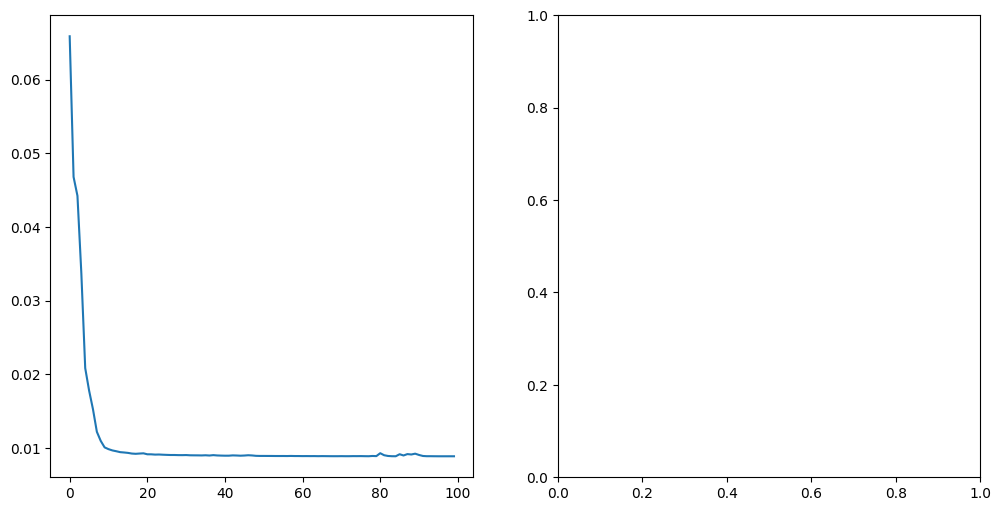

In [111]:
# Create a figure with two subplots arranged in a single row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot training & validation loss values
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Model accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [113]:
model.save("/content/drive/MyDrive/24Winter/cs320-w24/cs320-final-project/neural_network/exported_models/model2_possible.keras")